In [1]:
from datetime import datetime, timedelta
from mplsoccer import VerticalPitch
from matplotlib import animation
import matplotlib.pyplot as plt
from pathlib import Path
import imageio.v2 as iio
from tqdm import tqdm
import pandas as pd
import matplotlib
import zipfile
import shutil
import time
import json
import enum
from pathlib import Path
from pathlib import Path
import zipfile
# set pandas option to show columns of a dataframe
pd.set_option('display.max_columns', None)
import os
import sys
# Add the parent directory to sys.path to access the 'models' package
sys.path.append('..')

from models.setup_skillcorner import get_skillcorner_database, get_skillcorner_dataframes


In [122]:
def wyscout_json_to_df(file_name):
    # Create a directory to extract files to (same as zip file name without extension)
    extract_dir = file_name.split(".")[0]
    os.makedirs(extract_dir, exist_ok=True)  # Create the directory if it doesn't exist

    # Unzip the file
    with zipfile.ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    
    # Construct the full path to the json file
    json_name = os.path.join(extract_dir, os.path.basename(extract_dir) + ".json")

    # Read the json file
    with open(json_name, encoding='utf8') as f:
        js = json.load(f)
        df = pd.json_normalize(js['events'])
    return df

In [3]:


#get path of current directory in jupyter
current_directory = Path.cwd()
current_directory = current_directory.parents[0]


data_dir = os.path.join(current_directory,'data','england_games')
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
data_dir = Path(data_dir)


#path for matchid's
data_path= os.path.join(current_directory,'data')
wyscout_path = os.path.join(data_path,'wyscout')
input_dir = os.path.join(data_path,'skillcorner')
match_id_path = os.path.join(data_path,'matchids.csv')


#open matchid file
match_id = pd.read_csv(match_id_path)

#select matches where "home" == England or away == England
england_match = match_id[(match_id['home'] == 'England') | (match_id['away'] == 'England')]


In [4]:
england_match

,wyscout,skillcorner,date,home,result,away
1,5414104,NaN,2023-03-23,Italy,1-2,England
25,5414127,726848.0,2023-03-26,England,2-0,Ukraine
49,5414149,NaN,2023-06-16,Malta,0-4,England
74,5414173,NaN,2023-06-19,England,7-0,North Macedonia
114,5414212,NaN,2023-09-09,Ukraine,1-1,England
183,5414280,1381470.0,2023-10-17,England,3-1,Italy
204,5414298,1381488.0,2023-11-17,England,2-0,Malta
226,5414319,1381509.0,2023-11-20,North Macedonia,1-1,England


In [7]:
match_id = 726848
wyscout_id = england_match[england_match["skillcorner"] == match_id]["wyscout"].values[0]

#get all_dfs

save_dir = get_skillcorner_database(input_dir, match_id, data_dir)
dfs = get_skillcorner_dataframes(save_dir, match_id)


Metadata 726848 added ...
PlayDirection 726848 added ...
Tracking 726848 added ...
Visible Area 726848 added ...
Phase 726848 added ...
Lineup 726848 added ...
physical 726848 added ...
passes 726848 added ...
on_ball_pressures 726848 added ...
off_ball_runs 726848 added ...
Execution Time is 00:09


NameError: name 'load_dfs' is not defined

In [90]:

ball_id = tracking_df[tracking_df["z"]==tracking_df.z.max()]
ball_id["object_id"].values[0]

ball_during_game = tracking_df[tracking_df["object_id"]==ball_id["object_id"].values[0]]
ball_during_game


drop_columns = ["match_id", "half", "frame_id", "object_id", "extrapolated"]
ball_during_game = ball_during_game.drop(columns=drop_columns)
ball_during_game= ball_during_game.drop(columns = ["z"])


In [92]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt

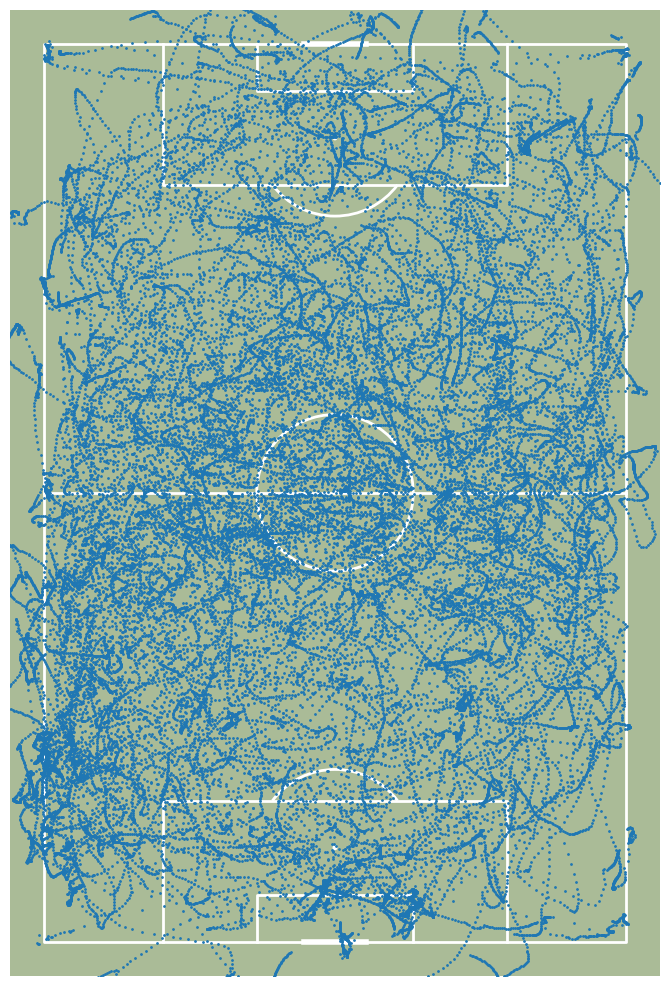

In [105]:
#ball movement during the game

pitch = VerticalPitch(pitch_color='#aabb97', line_color='white', pitch_type='skillcorner', pitch_length=105, pitch_width=68)
fig, ax = pitch.draw(figsize=(68*0.1, 105*0.1))
sc = ax.scatter(ball_during_game.y, ball_during_game.x, s=1, zorder=2)



In [135]:
ball_during_game

,timestamp,x,y
0,0,-0.06,-1.61
23,100,0.25,-1.77
46,200,0.24,-1.16
69,300,0.17,-0.76
92,400,0.18,-0.69
...,...,...,...
1033528,2894400,22.73,-14.83
1033551,2894500,22.71,-15.06
1033574,2894600,22.72,-15.08
1033597,2894700,22.63,-14.95


In [140]:
wyscout_event = wyscout_json_to_df(file_name = os.path.join(wyscout_path, f"{wyscout_id}.zip"))

In [132]:
wyscout_event.head()

,id,matchId,matchPeriod,minute,second,matchTimestamp,videoTimestamp,relatedEventId,shot,groundDuel,aerialDuel,infraction,carry,type.primary,type.secondary,location.x,location.y,team.id,team.name,team.formation,opponentTeam.id,opponentTeam.name,opponentTeam.formation,player.id,player.name,player.position,pass.accurate,pass.angle,pass.height,pass.length,pass.recipient.id,pass.recipient.name,pass.recipient.position,pass.endLocation.x,pass.endLocation.y,possession.id,possession.duration,possession.types,possession.eventsNumber,possession.eventIndex,possession.startLocation.x,possession.startLocation.y,possession.endLocation.x,possession.endLocation.y,possession.team.id,possession.team.name,possession.team.formation,possession.attack,pass,aerialDuel.opponent.id,aerialDuel.opponent.name,aerialDuel.opponent.position,aerialDuel.opponent.height,aerialDuel.firstTouch,aerialDuel.height,aerialDuel.relatedDuelId,infraction.yellowCard,infraction.redCard,infraction.type,infraction.opponent.id,infraction.opponent.name,infraction.opponent.position,carry.progression,carry.endLocation.x,carry.endLocation.y,groundDuel.opponent.id,groundDuel.opponent.name,groundDuel.opponent.position,groundDuel.duelType,groundDuel.keptPossession,groundDuel.progressedWithBall,groundDuel.stoppedProgress,groundDuel.recoveredPossession,groundDuel.takeOn,groundDuel.side,groundDuel.relatedDuelId,possession.attack.withShot,possession.attack.withShotOnGoal,possession.attack.withGoal,possession.attack.flank,possession.attack.xg,shot.bodyPart,shot.isGoal,shot.onTarget,shot.goalZone,shot.xg,shot.postShotXg,shot.goalkeeperActionId,shot.goalkeeper,possession,shot.goalkeeper.id,shot.goalkeeper.name
0,1716939794,5414127,1H,0,4,00:00:04.109,5.109585,1.716940e+09,NaN,NaN,NaN,NaN,NaN,pass,"[back_pass, short_or_medium_pass]",51,50,2413,England,4-3-3,14622,Ukraine,4-2-3-1,520291,B. Saka,RWF,True,-160.0,None,11.0,9380.0,J. Stones,RCB,41.0,44.0,1.716940e+09,9.854864,[],5.0,0.0,51.0,50.0,100.0,14.0,2413.0,England,4-3-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1716939795,5414127,1H,0,9,00:00:09.124,10.1243,1.716939e+09,NaN,NaN,NaN,NaN,NaN,pass,"[forward_pass, long_pass, pass_to_final_third,...",41,44,2413,England,4-3-3,14622,Ukraine,4-2-3-1,9380,J. Stones,RCB,True,-25.0,high,46.0,8717.0,H. Kane,CF,81.0,15.0,1.716940e+09,9.854864,[],5.0,1.0,51.0,50.0,100.0,14.0,2413.0,England,4-3-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1716938501,5414127,1H,0,11,00:00:11.647,12.647647,1.716939e+09,NaN,NaN,NaN,NaN,NaN,duel,[loose_ball_duel],19,85,14622,Ukraine,4-2-3-1,2413,England,4-3-3,105341,T. Stepanenko,RDMF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.716940e+09,9.854864,[],5.0,2.0,51.0,50.0,100.0,14.0,2413.0,England,4-3-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1716938813,5414127,1H,0,11,00:00:11.647,12.647647,1.716939e+09,NaN,NaN,NaN,NaN,NaN,duel,[loose_ball_duel],81,15,2413,England,4-3-3,14622,Ukraine,4-2-3-1,8717,H. Kane,CF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.716940e+09,9.854864,[],5.0,3.0,51.0,50.0,100.0,14.0,2413.0,England,4-3-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1716938915,5414127,1H,0,16,00:00:16.281,17.281251,NaN,NaN,NaN,NaN,NaN,NaN,game_interruption,[ball_out],0,86,14622,Ukraine,4-2-3-1,2413,England,4-3-3,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.716940e+09,9.854864,[],5.0,4.0,51.0,50.0,100.0,14.0,2413.0,England,4-3-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [133]:
#filter only passes
wyscout_event = wyscout_event[wyscout_event["type.primary"] == "pass"]

In [146]:
#select_all columns that have pass in it also include these location.x	location.y
passes_df = wyscout_event.filter(regex='pass|location')

In [153]:
passes_df

,location.x,location.y,pass.accurate,pass.angle,pass.height,pass.length,pass.recipient.id,pass.recipient.name,pass.recipient.position,pass.endLocation.x,pass.endLocation.y,pass
0,51,50,True,-160.0,None,11.0,9380.0,J. Stones,RCB,41.0,44.0,NaN
1,41,44,True,-25.0,high,46.0,8717.0,H. Kane,CF,81.0,15.0,NaN
2,19,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,81,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1675,16,20,True,21.0,high,9.0,544823.0,H. Sudakov,LDMF,24.0,25.0,NaN
1676,76,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1677,24,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1678,74,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


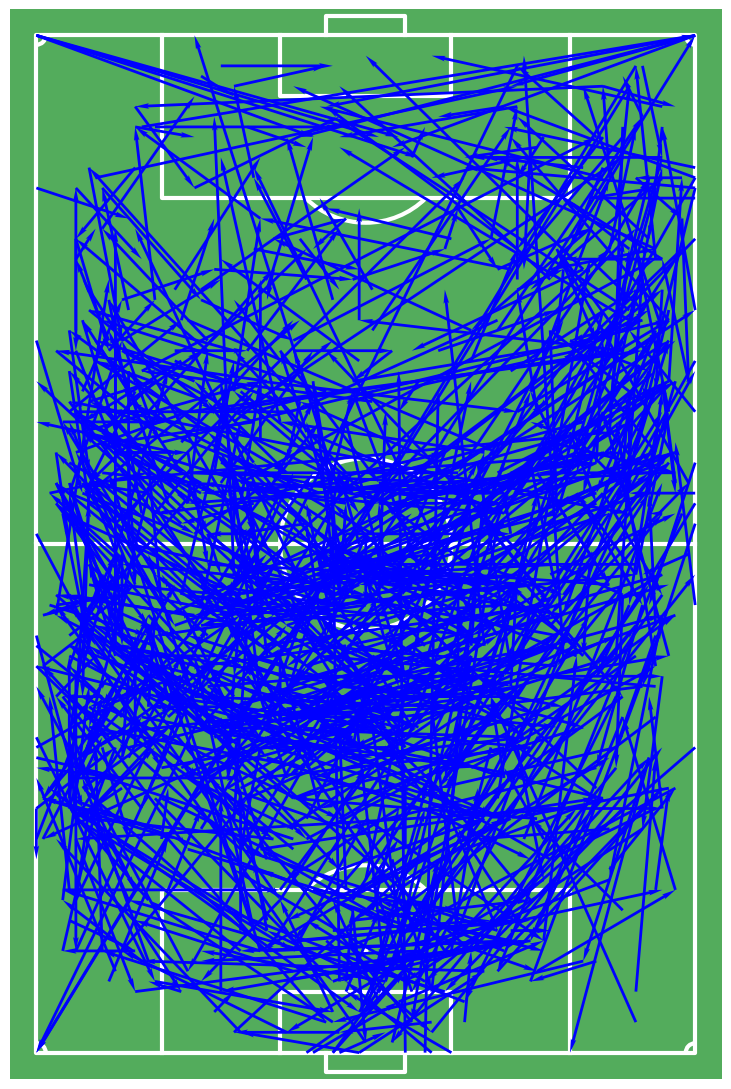

In [156]:

pitch = VerticalPitch(pitch_type='wyscout', goal_type='box', pitch_color='#53ac5c',
                      line_color='white', linewidth=3, corner_arcs=True)
fig, ax = pitch.draw(figsize=(16, 11))

pitch.arrows(passes_df['location.x'], passes_df['location.y'],
             passes_df['pass.endLocation.x'], passes_df['pass.endLocation.y'],
             width=2, headwidth=2, color='blue', ax=ax, label='completed passes')
